In [96]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns
import numpy as np
import math
import datetime
import re

In [97]:
df=pd.read_csv('mobile_prices_2023.csv')

In [98]:
df

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1831,"Infinix Note 7 (Forest Green, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1832,"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1833,"Infinix Note 7 (Aether Black, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1834,"Infinix Zero 8i (Silver Diamond, 128 GB)",4.2,"7,117",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",2023-06-17


In [99]:
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [100]:
df.shape

(1836, 11)

In [101]:
df.columns

Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR', 'Date of Scraping'],
      dtype='object')

In [102]:
df.dtypes

Phone Name            object
Rating ?/5           float64
Number of Ratings     object
RAM                   object
ROM/Storage           object
Back/Rare Camera      object
Front Camera          object
Battery               object
Processor             object
Price in INR          object
Date of Scraping      object
dtype: object

In [103]:
df.duplicated().sum()

69

In [104]:
duplicates = df[df.duplicated(subset='Phone Name', keep=False)]

print(duplicates)

                                    Phone Name  Rating ?/5 Number of Ratings  \
0                 POCO C50 (Royal Blue, 32 GB)         4.2            33,561   
10             POCO C50 (Country Green, 32 GB)         4.2            33,561   
17                POCO C50 (Royal Blue, 32 GB)         4.1            11,675   
19                POCO M4 Pro (Yellow, 128 GB)         4.2            21,133   
20             POCO C50 (Country Green, 32 GB)         4.1            11,675   
...                                        ...         ...               ...   
1740  Infinix NOTE 12i (Metaverse Blue, 64 GB)         4.2             5,955   
1763  Infinix Smart 6 (Light Sea Green, 64 GB)         4.3            32,464   
1764  Infinix Smart 6 (Light Sea Green, 64 GB)         4.3            32,464   
1811   Infinix Smart 5 (Obsidian Black, 32 GB)         4.3          1,07,450   
1815   Infinix Smart 5 (Obsidian Black, 32 GB)         4.3          1,07,450   

           RAM ROM/Storage         Back

In [105]:
#Removes Duplicates
df = df.drop_duplicates()
df

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1831,"Infinix Note 7 (Forest Green, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1832,"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1833,"Infinix Note 7 (Aether Black, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1834,"Infinix Zero 8i (Silver Diamond, 128 GB)",4.2,"7,117",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",2023-06-17


In [106]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          162
Back/Rare Camera       8
Front Camera         381
Battery                9
Processor             49
Price in INR           0
Date of Scraping       0
dtype: int64

In [107]:
df = df.fillna("NaN")

In [108]:
df.isnull().sum()

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

In [109]:
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating ?/5,1767.0,4.212281,0.534338,0.0,4.2,4.3,4.4,4.8


# DATA PREPROCESSING AND CLEANING

In [111]:
#LET EXTRACT THE COMPANY NAME FROM THE PHONE NAME
df['Company Name'] = df['Phone Name'].str.split().str[0]

In [112]:
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Company Name
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17,POCO
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17,POCO
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17,POCO
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17,POCO
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17,POCO


In [113]:
df.tail()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Company Name
1831,"Infinix Note 7 (Forest Green, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17,Infinix
1832,"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17,Infinix
1833,"Infinix Note 7 (Aether Black, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17,Infinix
1834,"Infinix Zero 8i (Silver Diamond, 128 GB)",4.2,"7,117",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",2023-06-17,Infinix
1835,"Infinix S5 (Quetzal Cyan, 64 GB)",4.3,"15,701",4 GB RAM,64 GB ROM,16MP + 5MP + 2MP + Low Light Sensor,32MP Front Camera,4000 mAh,Helio P22 (MTK6762) Processor,"₹10,999",2023-06-17,Infinix


In [114]:
df['Company Name'].unique()

array(['POCO', 'realme', 'Realme', 'APPLE', 'Apple', 'SAMSUNG', 'OPPO',
       'Google', 'vivo', 'Nothing', 'REDMI', 'Redmi', 'Mi', 'Xiaomi',
       '10A', '�9A', 'Nokia', 'MOTOROLA', 'A10E', 'Motorola', 'a', 'Moto',
       'OnePlus', 'Huawei', 'Nexus', 'Alcatel', 'Lenovo', 'Infinix'],
      dtype=object)

In [115]:
#we can observe that some names occurs twice like Realme, realme, APPLE, Apple, Redmi,redmi, Mi Xiaomi
# we need to merge the common name to a unique way.

df['Company Name'] = df['Company Name'].str.replace('realme','Realme')
df['Company Name'] = df['Company Name'].str.replace('Apple','APPLE')
df['Company Name'] = df['Company Name'].str.replace('Redmi','REDMI')
df['Company Name'] = df['Company Name'].str.replace('Mi','Xiaomi')
df['Company Name'] = df['Company Name'].str.replace('Motorola','MOTOROLA')
df['Company Name'] = df['Company Name'].str.replace('Moto','MOTOROLA')

In [116]:
df['Company Name'].unique()

array(['POCO', 'Realme', 'APPLE', 'SAMSUNG', 'OPPO', 'Google', 'vivo',
       'Nothing', 'REDMI', 'Xiaomi', '10A', '�9A', 'Nokia', 'MOTOROLA',
       'A10E', 'a', 'OnePlus', 'Huawei', 'Nexus', 'Alcatel', 'Lenovo',
       'Infinix'], dtype=object)

In [117]:
#Let remove '10A','?9A', 'A10E', 'a', from the company name as there are no such companies

df = df[(df['Company Name'] != '10A') & (df['Company Name'] != 'a')  &
        (df['Company Name'] != '�9A') & (df['Company Name'] != 'A10E')]

In [118]:
df['Company Name'].unique()

array(['POCO', 'Realme', 'APPLE', 'SAMSUNG', 'OPPO', 'Google', 'vivo',
       'Nothing', 'REDMI', 'Xiaomi', 'Nokia', 'MOTOROLA', 'OnePlus',
       'Huawei', 'Nexus', 'Alcatel', 'Lenovo', 'Infinix'], dtype=object)

In [119]:
#create a new Dataframe and copy to it.

dfnew= df.copy()

In [120]:
dfnew.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Company Name
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17,POCO
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17,POCO
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17,POCO
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17,POCO
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17,POCO


In [121]:
# let's extract the Ram size from the RAM column
# We use regular expressions (regex) in Python to do this. 
#Assuming the RAM values are in the format of "X GB RAM", where X represents the RAM size, 
#we can extract the numeric value using regex.

def extract_ram_size(ram):
    matches = re.findall(r'\d+', ram)
    if matches:
        return matches[0]
    else:
        return None

dfnew['RAM Size'] = dfnew['RAM'].apply(extract_ram_size)

In [122]:
dfnew.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Company Name,RAM Size
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17,POCO,2
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17,POCO,4
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17,POCO,4
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17,POCO,4
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17,POCO,4


In [123]:
dfnew['RAM Size'].unique()

array(['2', '4', '6', '3', '8', '12', '128', '64', '256', '512', '16',
       '32', '1', None, '0', '153', '48', '768', '60', '80', '50'],
      dtype=object)

In [124]:
dfnew = dfnew[(dfnew['RAM Size'] != 'NA') & (dfnew['RAM Size'] != 'Expandable') 
          & (dfnew['RAM Size'] != 'cm') & (dfnew['RAM Size'] != '768')]

In [125]:
dfnew['RAM Size'].unique()

array(['2', '4', '6', '3', '8', '12', '128', '64', '256', '512', '16',
       '32', '1', None, '0', '153', '48', '60', '80', '50'], dtype=object)

In [126]:
#check point
dfnew_2=dfnew.copy()

In [127]:
# To remove the currency symbol in data values in "Price in INR" column
dfnew_2['Price in INR'] = dfnew_2['Price in INR'].str.replace('₹', '')
dfnew_2['Price in INR'] = dfnew_2['Price in INR'].str.replace(',', '')

In [128]:
# Convert the 'Price in INR' column to numeric data type
dfnew_2['Price in INR'] = pd.to_numeric(dfnew_2['Price in INR'])

In [129]:
dfnew_2.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Company Name,RAM Size
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO,2
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO,4
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17,POCO,4
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749,2023-06-17,POCO,4
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17,POCO,4


In [130]:
#Now let's extract the Storage size from Rom column
def extract_storage_size(storage):
    matches = re.findall(r'\d+', storage)
    if matches:
        return matches[0]
    else:
        return None

dfnew_2['Storage Size'] = dfnew_2['ROM/Storage'].apply(extract_storage_size)

In [131]:
dfnew_2['Storage Size'].isnull().sum()

164

In [132]:
dfnew_2.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Company Name,RAM Size,Storage Size
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO,2,32
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO,4,64
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17,POCO,4,64
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749,2023-06-17,POCO,4,64
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17,POCO,4,64


# Now extrating the values for Battery column

In [133]:
def extract_battery_capacity(battery):
    matches = re.findall(r'\d+', battery)
    if matches:
        return matches[0]
    else:
        return None

dfnew_2['Battery Capacity'] = dfnew_2['Battery'].apply(extract_battery_capacity)

In [134]:
dfnew_2['Battery Capacity'].unique()

array(['5000', '4500', '4000', '5160', '6000', '5065', '4200', '4300',
       '4230', '15', '13', '14', '16', '12', '9', None, '1', '800', '0',
       '3300', '3900', '7000', '3700', '4700', '3000', '1500', '1000',
       '2000', '2600', '2050', '4800', '4015', '4025', '3400', '3765',
       '4350', '4310', '3200', '4020', '4410', '4270', '4926', '2915',
       '4600', '4030', '4050', '4810', '4830', '4870', '4450', '3315',
       '3225', '3260', '4250', '4520', '3080', '3120', '5018', '4100',
       '5020', '4850', '3030', '3010', '4820', '4780', '5300', '1020',
       '1200', '1450', '1150', '5050', '3060', '4950', '2150', '950',
       '1430', '1110', '4400', '2', '4610', '4115', '3800', '4085',
       '2100', '3340', '3450', '2300', '2200', '2610', '2580', '1400',
       '850', '650', '1800', '2500', '3760', '3500', '5200'], dtype=object)

In [135]:
#Remove the wrong values from the battery capacity

dfnew_2= dfnew_2[(dfnew_2['Battery Capacity'] != 'A15') & (dfnew_2['Battery Capacity'] != 'A13') & 
                 (dfnew_2['Battery Capacity']!= 'A14') & (dfnew_2['Battery Capacity'] != 'A16') & 
                 (dfnew_2['Battery Capacity'] != 'A12') & (dfnew_2['Battery Capacity'] != 'A9') & 
                 (dfnew_2['Battery Capacity'] != 'Apple') & (dfnew_2['Battery Capacity']!= '1') & 
                 (dfnew_2['Battery Capacity'] != '0') & (dfnew_2['Battery Capacity'] != 'nan') &
                   (dfnew_2['Battery Capacity']!= 'MediaTek') & (dfnew_2['Battery Capacity'] != 'Unisoc') 
                 & (dfnew_2['Battery Capacity']!= '2') & (dfnew_2['Battery Capacity'] != 'Brand')]

In [136]:
dfnew_2['Battery Capacity'].unique()

array(['5000', '4500', '4000', '5160', '6000', '5065', '4200', '4300',
       '4230', '15', '13', '14', '16', '12', '9', None, '800', '3300',
       '3900', '7000', '3700', '4700', '3000', '1500', '1000', '2000',
       '2600', '2050', '4800', '4015', '4025', '3400', '3765', '4350',
       '4310', '3200', '4020', '4410', '4270', '4926', '2915', '4600',
       '4030', '4050', '4810', '4830', '4870', '4450', '3315', '3225',
       '3260', '4250', '4520', '3080', '3120', '5018', '4100', '5020',
       '4850', '3030', '3010', '4820', '4780', '5300', '1020', '1200',
       '1450', '1150', '5050', '3060', '4950', '2150', '950', '1430',
       '1110', '4400', '4610', '4115', '3800', '4085', '2100', '3340',
       '3450', '2300', '2200', '2610', '2580', '1400', '850', '650',
       '1800', '2500', '3760', '3500', '5200'], dtype=object)

In [137]:
#check point
df3 = dfnew_2.copy()

In [138]:
#Let change some columns datatypes

In [139]:
df3['Price in INR'] = df3['Price in INR'].astype(int)
df3['RAM Size'] = df3['RAM Size'].astype(float)

In [140]:
#Date column
df3['Date of Scraping'] = pd.to_datetime(df3['Date of Scraping'])

In [141]:
df3.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Company Name,RAM Size,Storage Size,Battery Capacity
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO,2.0,32,5000
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO,4.0,64,5000
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64,5000
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749,2023-06-17,POCO,4.0,64,5000
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64,5000


In [142]:
#Remove unwanted columns
cols_list = ['RAM','ROM/Storage','Battery']
df3.drop(cols_list,axis=1,inplace=True)
df3.head()

,Phone Name,Rating ?/5,Number of Ratings,Back/Rare Camera,Front Camera,Processor,Price in INR,Date of Scraping,Company Name,RAM Size,Storage Size,Battery Capacity
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",8MP Dual Camera,5MP Front Camera,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO,2.0,32,5000
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",50MP + 2MP,8MP Front Camera,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO,4.0,64,5000
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",8MP Dual Rear Camera,5MP Front Camera,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64,5000
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",50MP Dual Rear Camera,5MP Front Camera,Mediatek Helio G85 Processor,7749,2023-06-17,POCO,4.0,64,5000
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",8MP Dual Rear Camera,5MP Front Camera,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64,5000


In [143]:
df3.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
Back/Rare Camera       0
Front Camera           0
Processor              0
Price in INR           0
Date of Scraping       0
Company Name           0
RAM Size              11
Storage Size         148
Battery Capacity      22
dtype: int64

In [144]:
df3.dropna(inplace=True)

In [145]:
df3.isnull().sum()

Phone Name           0
Rating ?/5           0
Number of Ratings    0
Back/Rare Camera     0
Front Camera         0
Processor            0
Price in INR         0
Date of Scraping     0
Company Name         0
RAM Size             0
Storage Size         0
Battery Capacity     0
dtype: int64

In [146]:
#The date is now clean for further Analysis

# EDA OF THE DATASET
#UNIVARIATE 

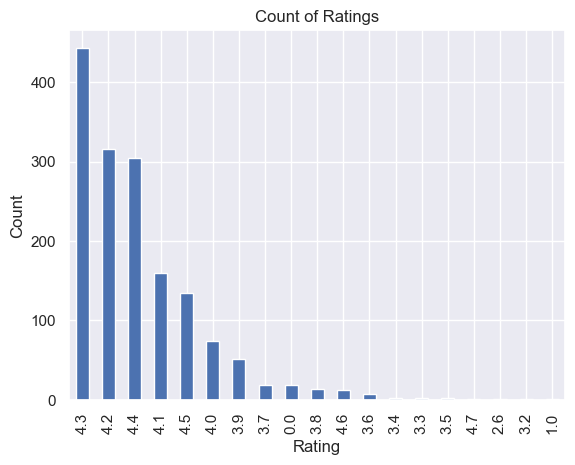

In [147]:
df3["Rating ?/5"].value_counts().plot(kind="bar", xlabel="Rating", ylabel="Count", title= "Count of Ratings")
plt.show()

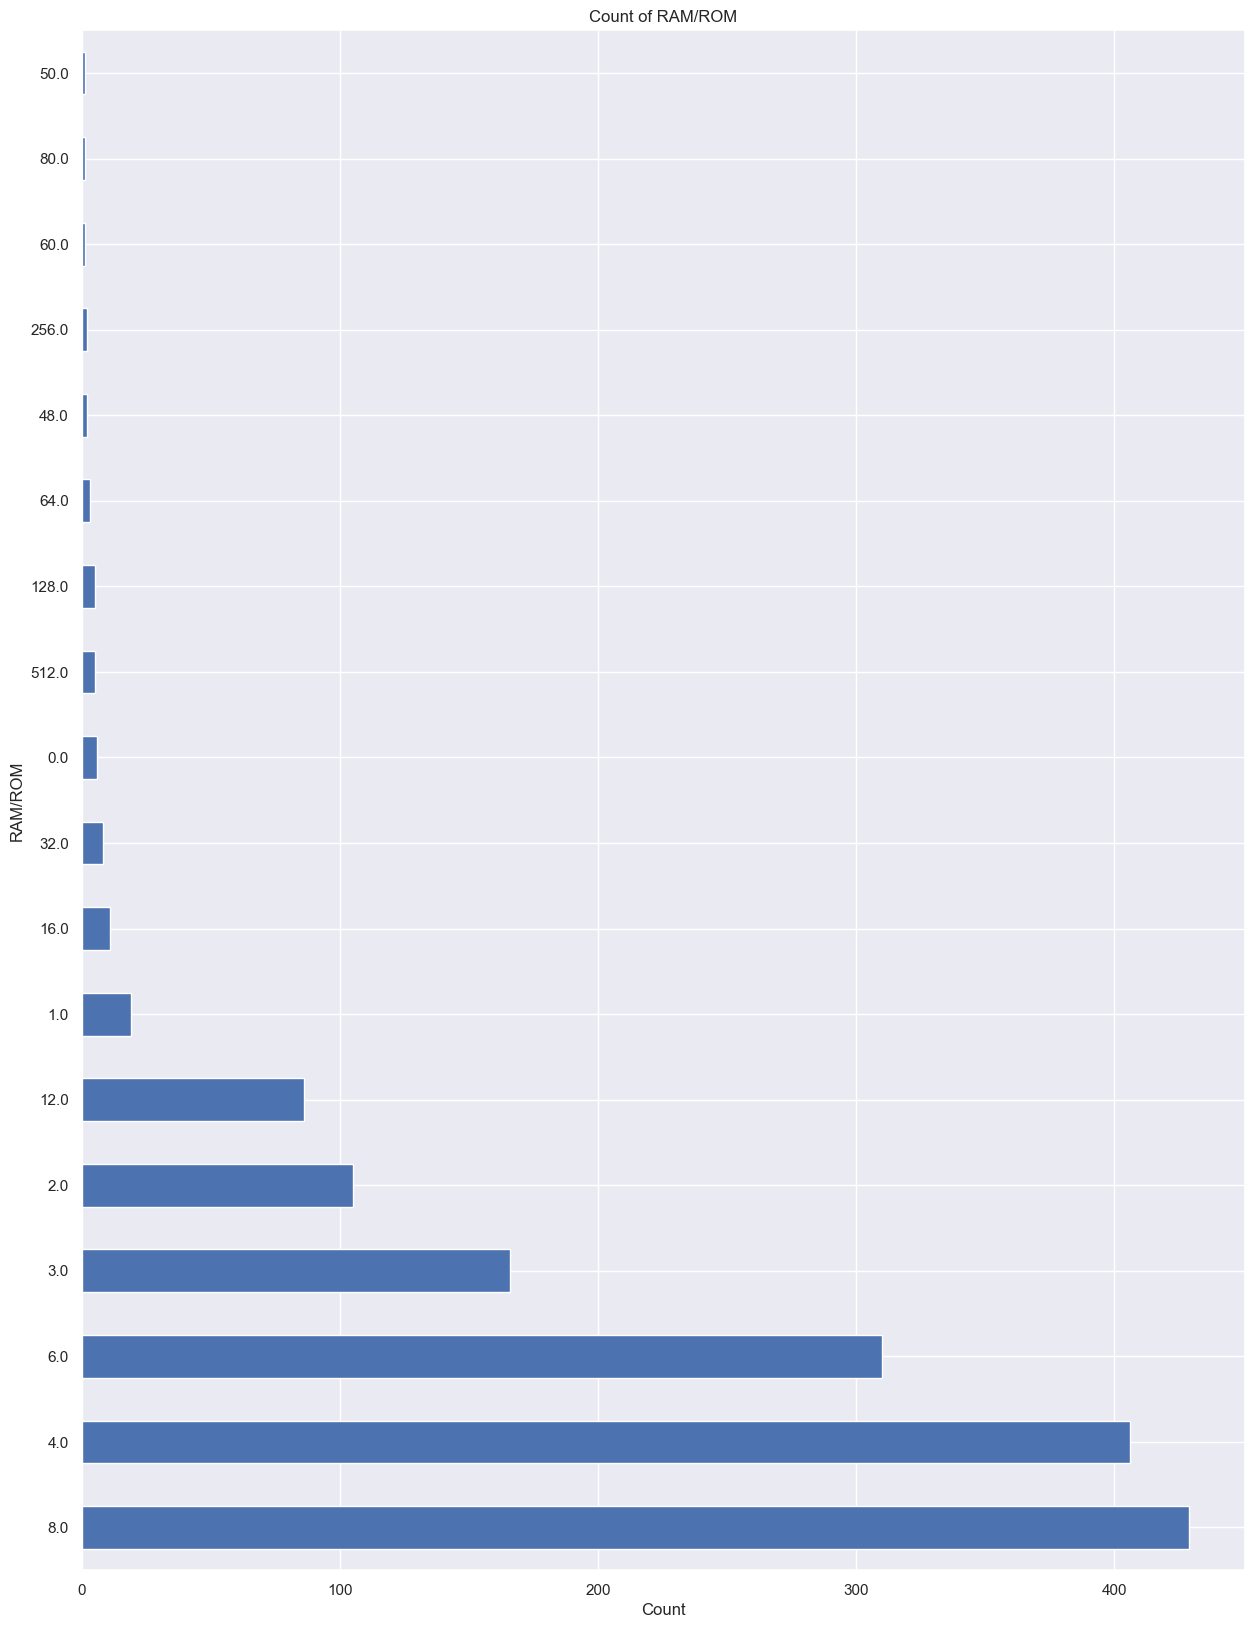

In [148]:
df3["RAM Size"].value_counts().plot(kind="barh", figsize=(15, 20), xlabel="Count", ylabel="RAM/ROM", title="Count of RAM/ROM")
plt.show()

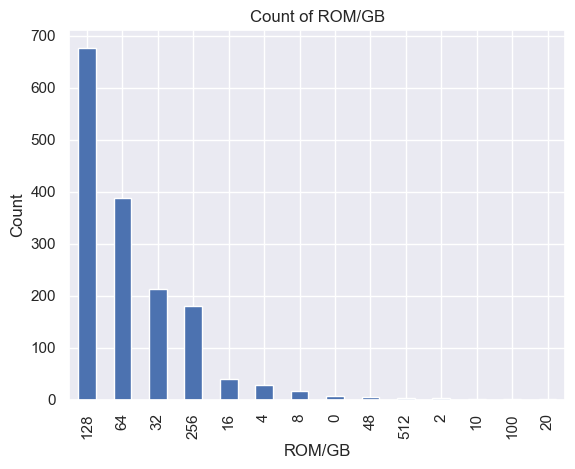

In [149]:
df3["Storage Size"].value_counts().head(20).plot(kind="bar", xlabel="ROM/GB", ylabel="Count", title="Count of ROM/GB")
plt.show()

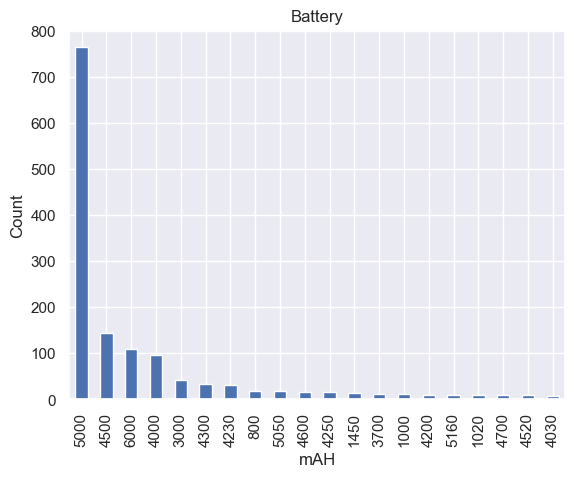

In [150]:
df3["Battery Capacity"].value_counts().head(20).plot(kind="bar", xlabel="mAH", ylabel="Count", title="Battery")
plt.show()

In [151]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating ?/5,1566.0,4.19636,0.507395,0.0,4.2,4.3,4.4,4.7
Price in INR,1566.0,19530.34802,14931.035749,1199.0,10499.0,15495.0,23999.0,134999.0
RAM Size,1566.0,8.49106,31.068711,0.0,4.0,6.0,8.0,512.0


In [152]:
df3.describe(include='object')

,Phone Name,Number of Ratings,Back/Rare Camera,Front Camera,Processor,Company Name,Storage Size,Battery Capacity
count,1566,1566,1566,1566,1566,1566,1566,1566
unique,1327,660,157,33,323,17,14,88
top,"OnePlus 10R 5G (Sierra Black, 256 GB)",0,50MP Rear Camera,16MP Front Camera,Qualcomm Snapdragon 680 Processor,Realme,128,5000
freq,5,19,95,327,45,231,677,764


C:\Users\Akinmegs\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


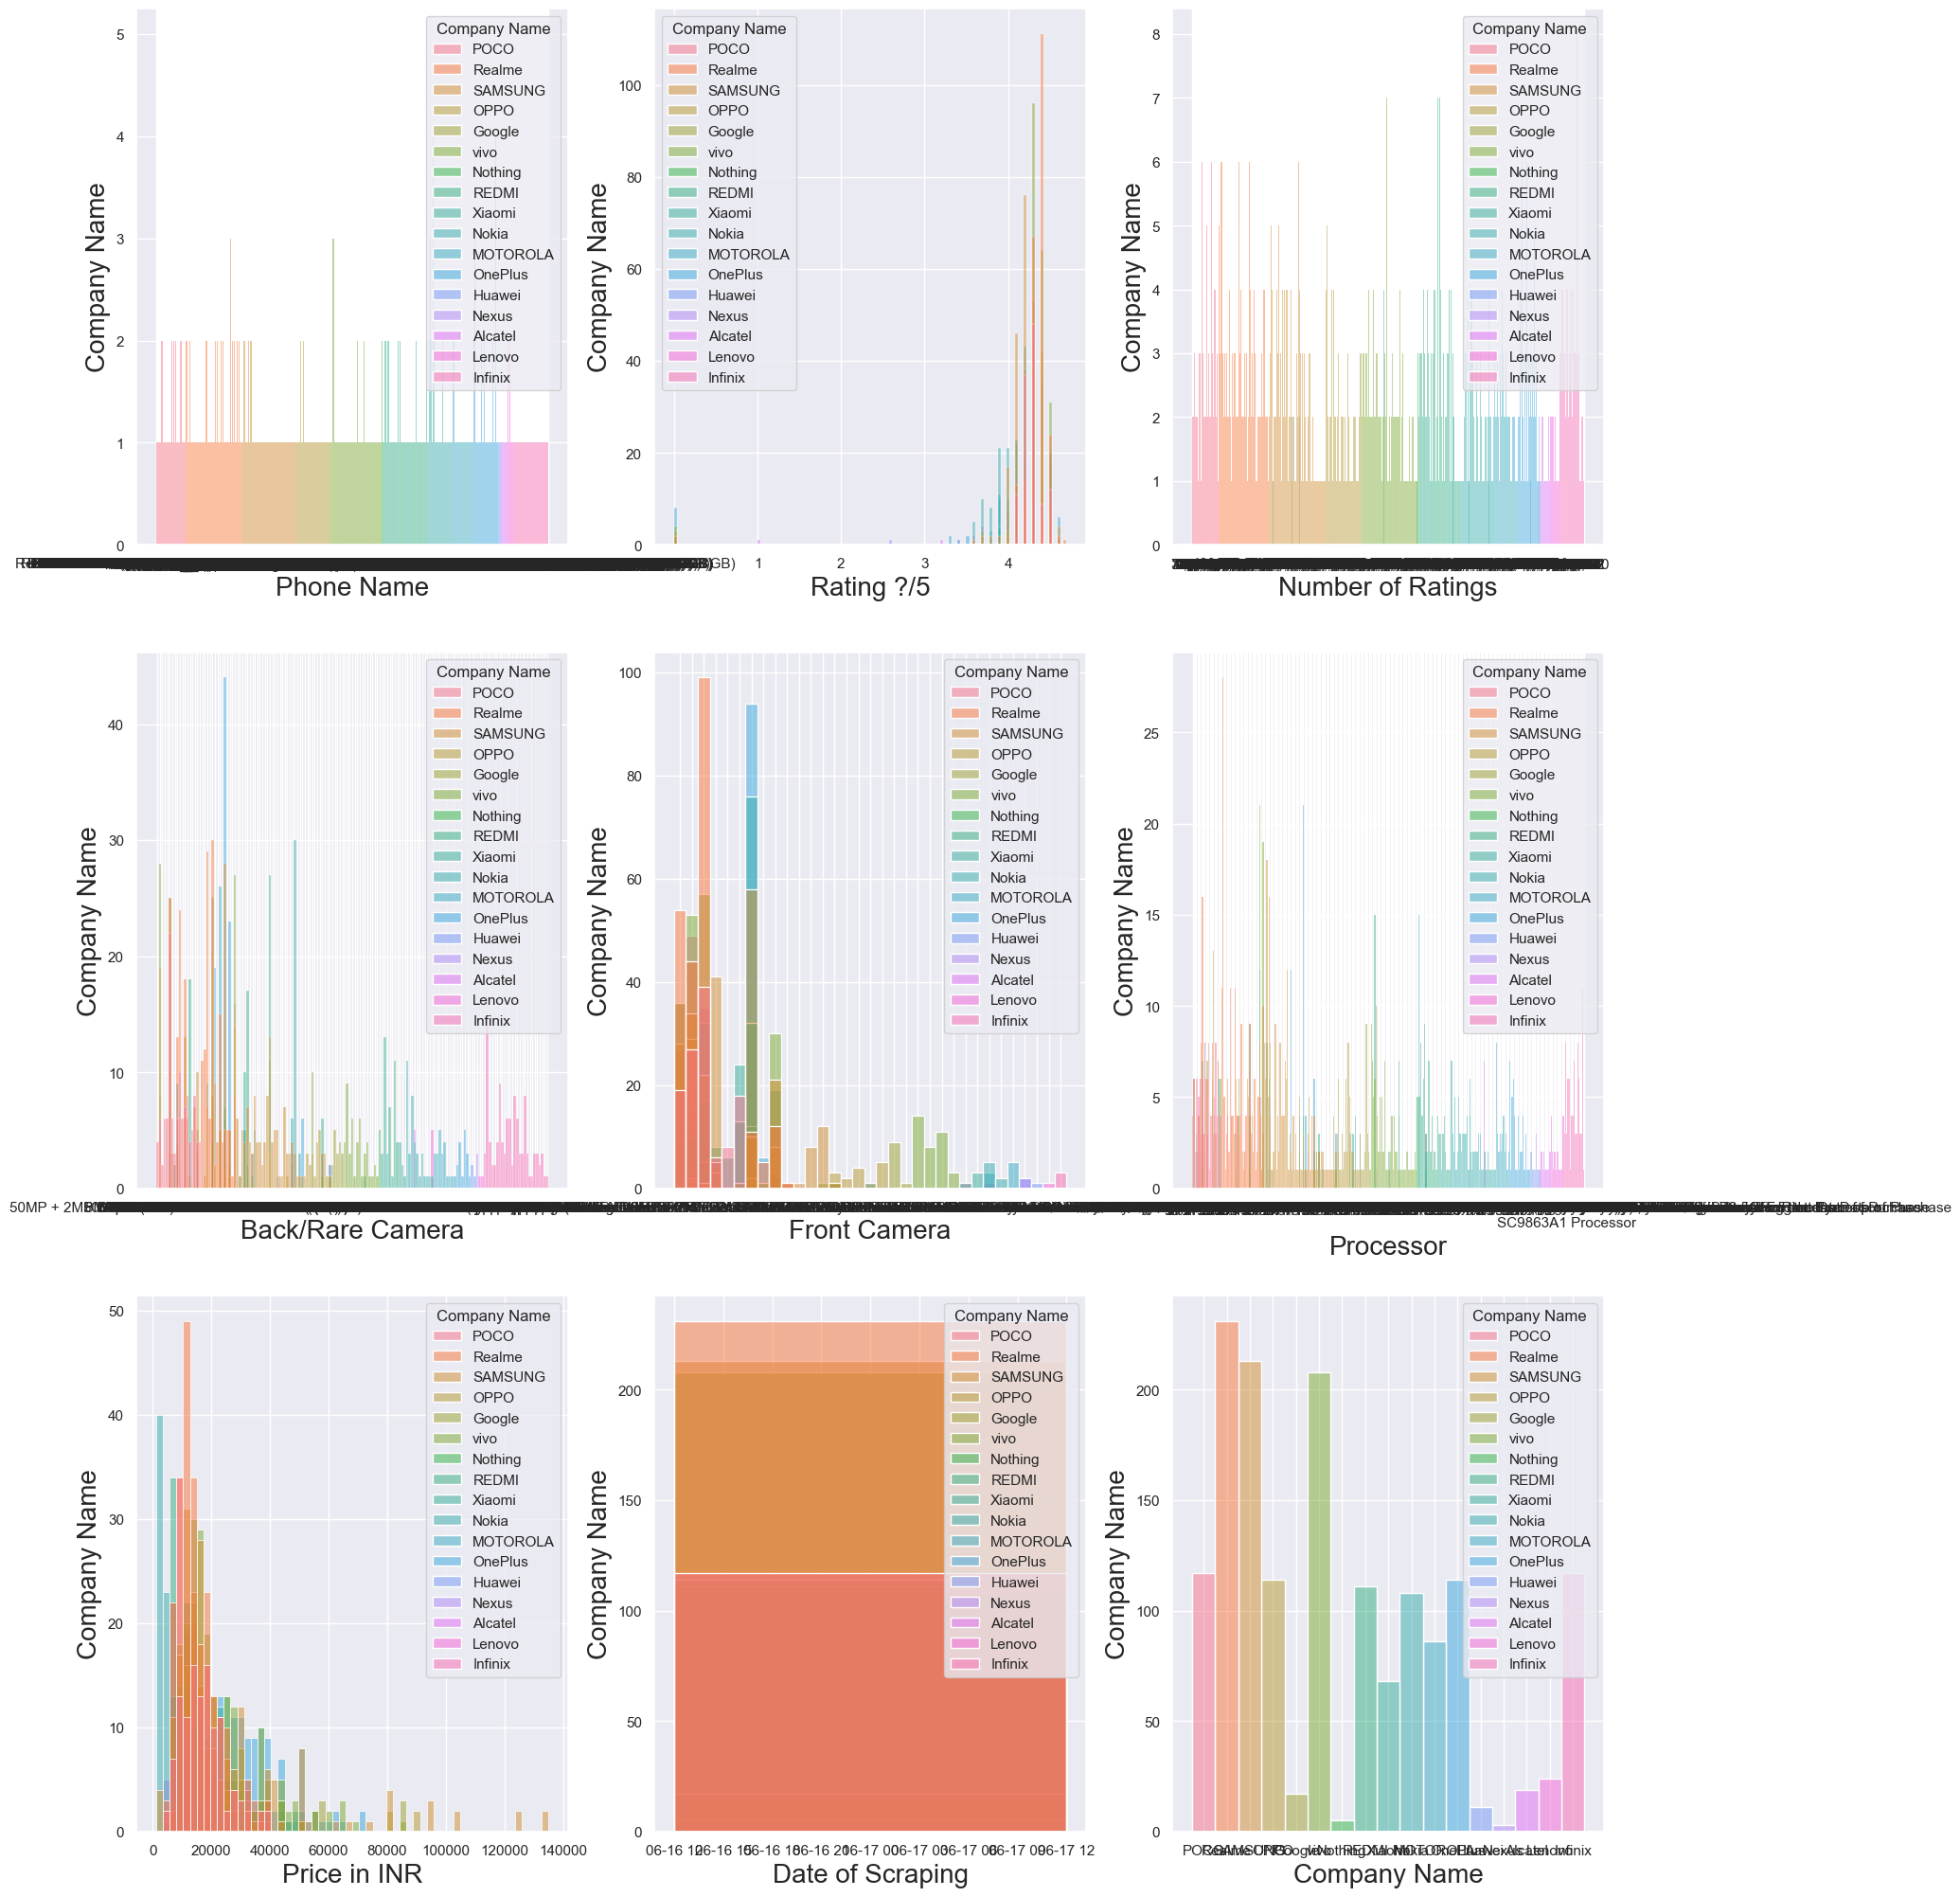

In [153]:
#Bivariate 
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df3.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=df3[column],hue=df3['Company Name']) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        plt.ylabel('Company Name',fontsize=20)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

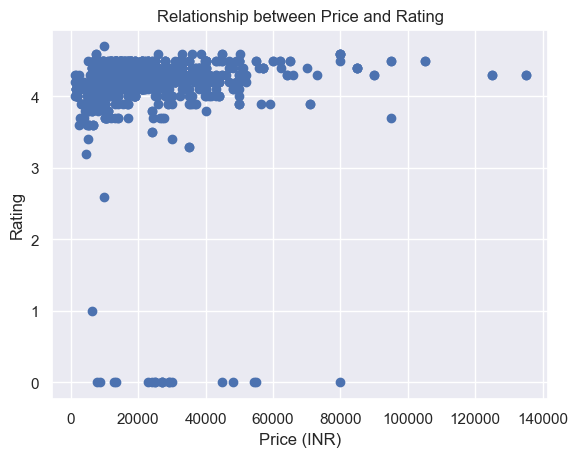

In [154]:
# Extracting columns
prices = df3['Price in INR']
ratings = df3['Rating ?/5']

# Scatter plot
plt.scatter(prices, ratings)
plt.xlabel('Price (INR)')
plt.ylabel('Rating')
plt.title('Relationship between Price and Rating')
plt.show()

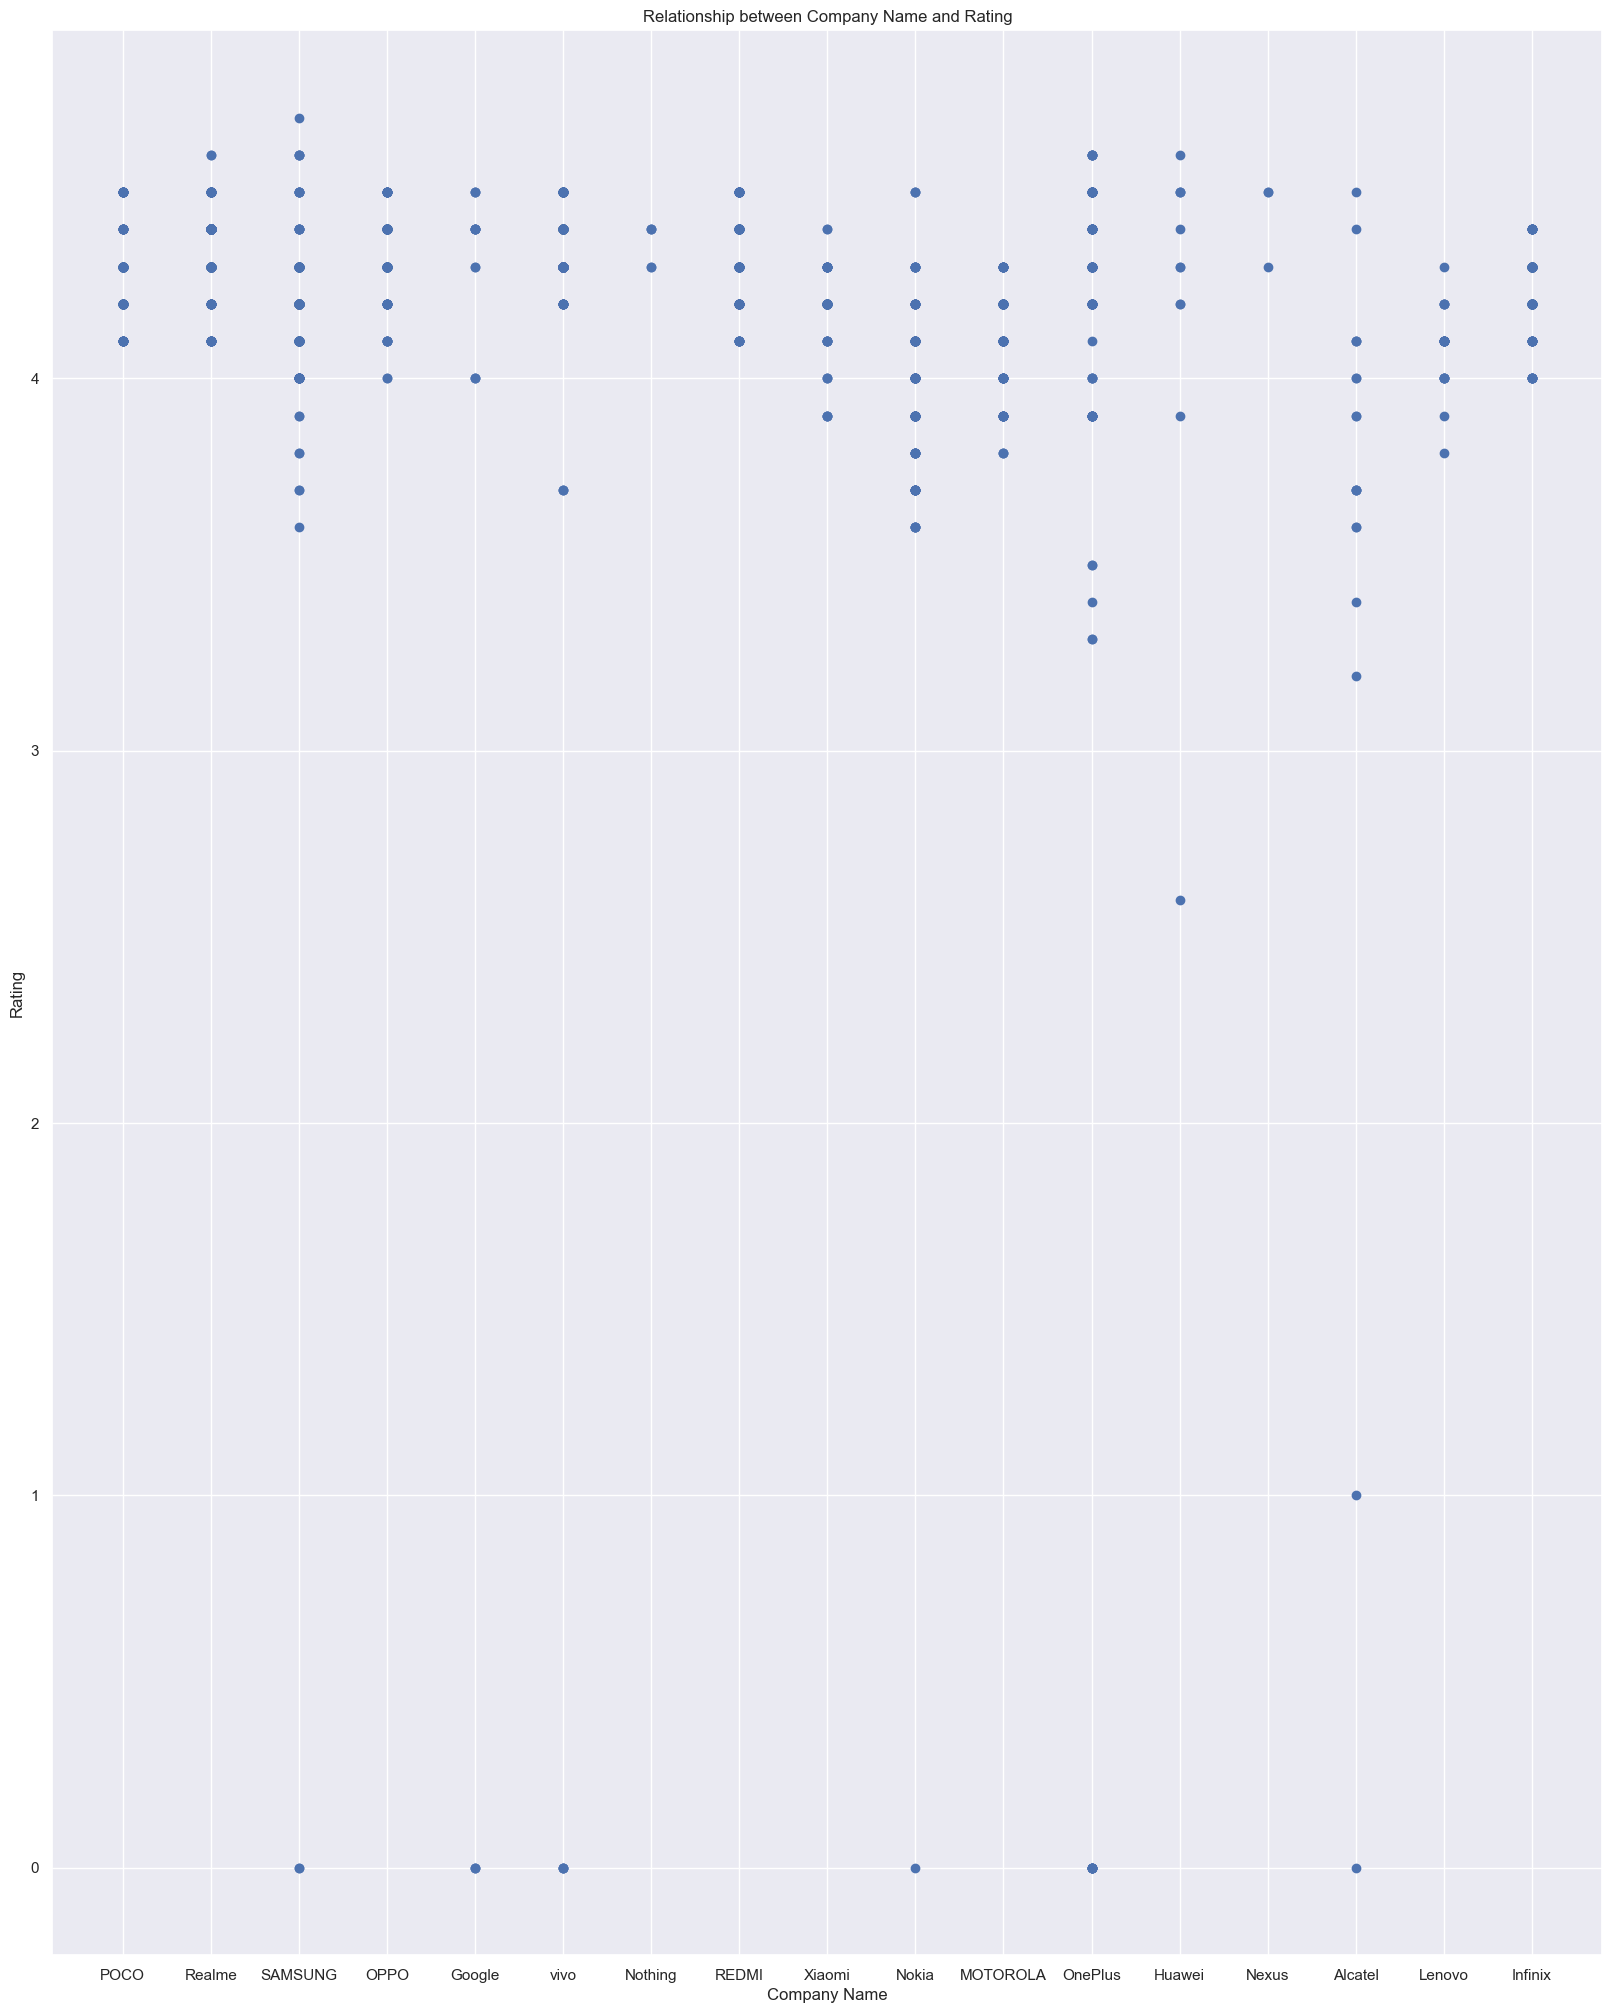

In [155]:
# Extracting columns
plt.figure(figsize=(20,25))
prices = df3['Company Name']
ratings = df3['Rating ?/5']

# Scatter plot
plt.scatter(prices, ratings)
plt.xlabel('Company Name')
plt.ylabel('Rating')
plt.title('Relationship between Company Name and Rating')
plt.show()

C:\Users\Akinmegs\AppData\Local\Temp\ipykernel_10104\422564155.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation


<Axes: >

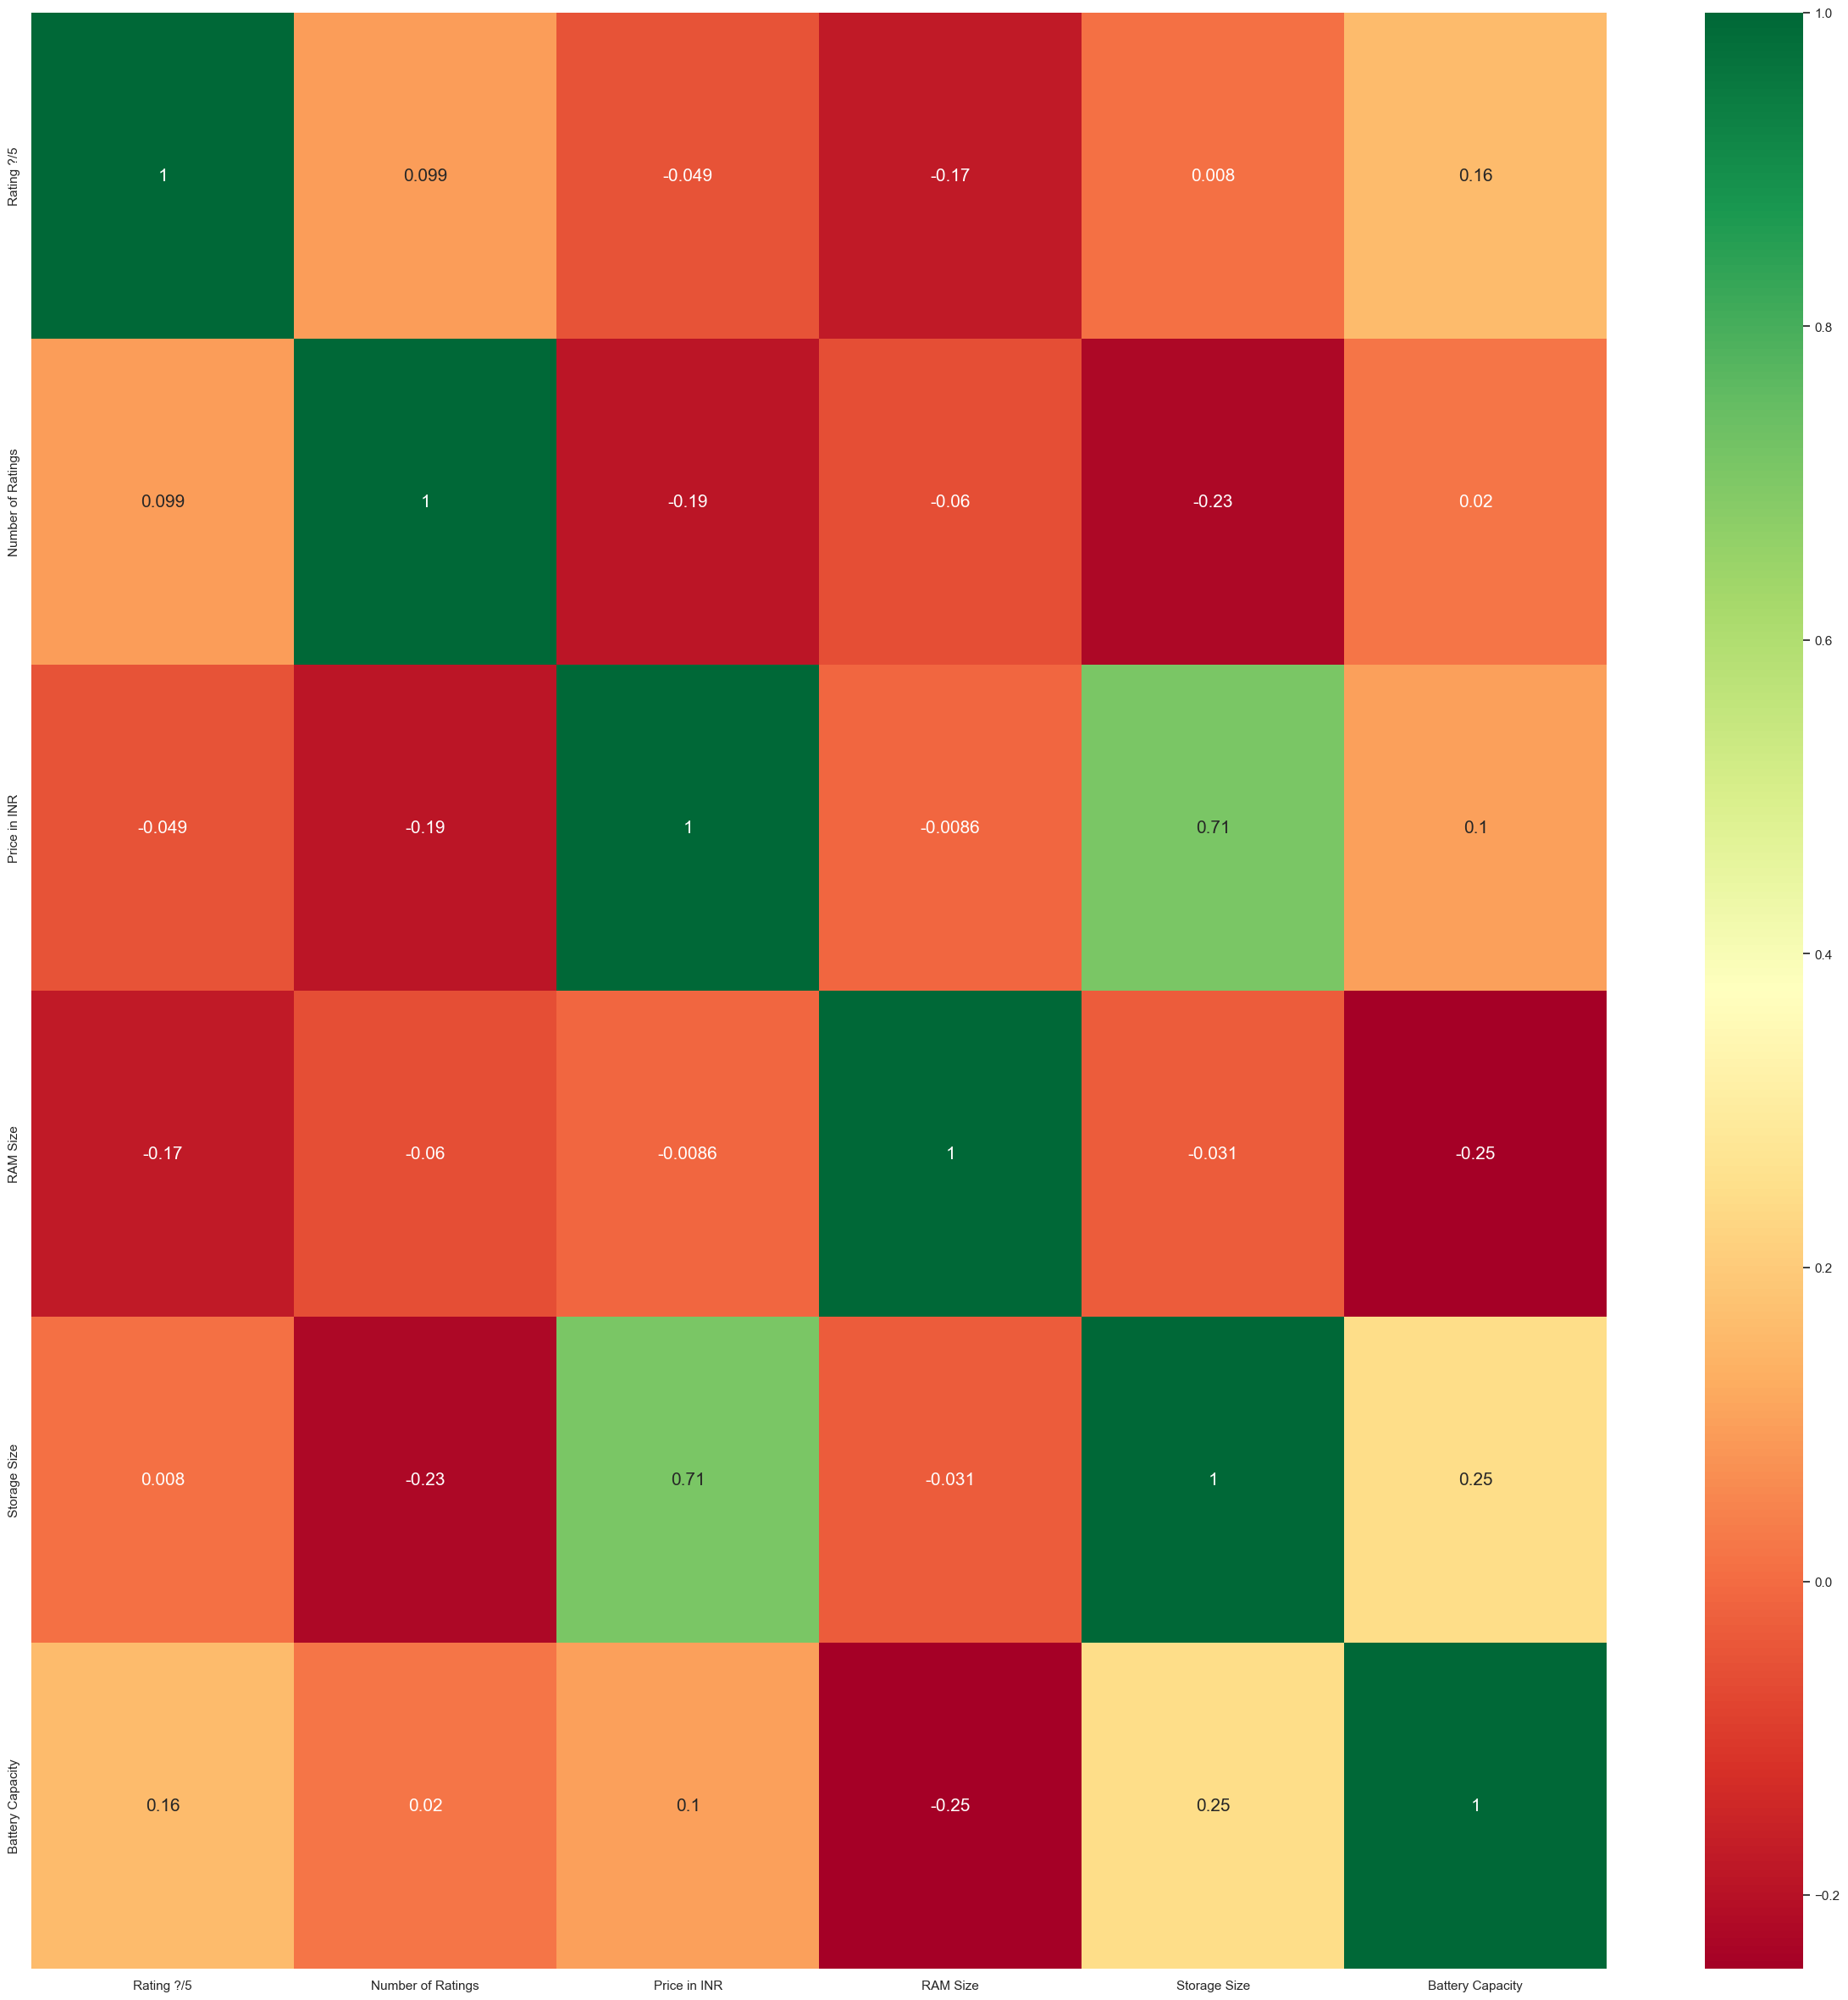

In [192]:
plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(df3.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [156]:
df3.head()

,Phone Name,Rating ?/5,Number of Ratings,Back/Rare Camera,Front Camera,Processor,Price in INR,Date of Scraping,Company Name,RAM Size,Storage Size,Battery Capacity
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",8MP Dual Camera,5MP Front Camera,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO,2.0,32,5000
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",50MP + 2MP,8MP Front Camera,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO,4.0,64,5000
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",8MP Dual Rear Camera,5MP Front Camera,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64,5000
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",50MP Dual Rear Camera,5MP Front Camera,Mediatek Helio G85 Processor,7749,2023-06-17,POCO,4.0,64,5000
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",8MP Dual Rear Camera,5MP Front Camera,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64,5000


In [157]:
#Let remove some columns from the dataframe
df3.drop(['Phone Name','Front Camera','Back/Rare Camera'],axis=1,inplace=True)

In [83]:
df3.head()

,Rating ?/5,Number of Ratings,Processor,Price in INR,Date of Scraping,Company Name,RAM Size,Storage Size,Battery Capacity
0,4.2,"33,561","Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO,2.0,32,5000
1,4.2,"77,128",Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO,4.0,64,5000
2,4.3,"15,175",Helio G36 Processor,6999,2023-06-17,POCO,4.0,64,5000
3,4.2,"22,621",Mediatek Helio G85 Processor,7749,2023-06-17,POCO,4.0,64,5000
4,4.3,"15,175",Helio G36 Processor,6999,2023-06-17,POCO,4.0,64,5000


# MODEL BUILDING 

# LINEAR REGRESSION ALGORITHM

In [160]:
df3.dtypes

Rating ?/5                    int32
Number of Ratings            object
Processor                    object
Price in INR                  int32
Date of Scraping     datetime64[ns]
Company Name                 object
RAM Size                    float64
Storage Size                 object
Battery Capacity             object
dtype: object

In [163]:
# Remove commas from "Number of Ratings" column
df3['Number of Ratings'] = df3['Number of Ratings'].str.replace(',', '')

In [175]:
# Change data types of columns
df3['Number of Ratings'] = df3['Number of Ratings'].astype(int)
df3['RAM Size'] = df3['RAM Size'].astype(int)
df3['Storage Size'] = df3['Storage Size'].astype(int)
df3['Battery Capacity'] = df3['Battery Capacity'].astype(int)

In [178]:
df3.dtypes

Rating ?/5                    int32
Number of Ratings             int32
Processor                    object
Price in INR                  int32
Date of Scraping     datetime64[ns]
Company Name                 object
RAM Size                      int32
Storage Size                  int32
Battery Capacity              int32
dtype: object

In [176]:
df3.head()

,Rating ?/5,Number of Ratings,Processor,Price in INR,Date of Scraping,Company Name,RAM Size,Storage Size,Battery Capacity
0,4,33561,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO,2,32,5000
1,4,77128,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO,4,64,5000
2,4,15175,Helio G36 Processor,6999,2023-06-17,POCO,4,64,5000
3,4,22621,Mediatek Helio G85 Processor,7749,2023-06-17,POCO,4,64,5000
4,4,15175,Helio G36 Processor,6999,2023-06-17,POCO,4,64,5000


In [179]:
X=df3.drop(["Price in INR","Processor","Date of Scraping","Company Name"],axis=1) # Input variable (independent variable)
y=df3['Price in INR']   # Target variable (dependent variable)

In [180]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
from sklearn.model_selection import train_test_split

# Extracting input and target variables
#X = df[['Price in INR']]  # Input variable (independent variable)
#y = df['Rating ?/5']  # Target variable (dependent variable)

# Splitting the dataset into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
X_train.shape

(1252, 5)

In [183]:
X_test.shape

(314, 5)

In [184]:
y_train.shape

(1252,)

In [185]:
y_test.shape

(314,)

In [186]:
df3.dtypes

Rating ?/5                    int32
Number of Ratings             int32
Processor                    object
Price in INR                  int32
Date of Scraping     datetime64[ns]
Company Name                 object
RAM Size                      int32
Storage Size                  int32
Battery Capacity              int32
dtype: object

In [188]:

from sklearn.linear_model import LinearRegression

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X, y)


#Make Predictions
y_pred=model.predict(X_test)
y_pred

array([12405.93623945, 13013.90959905, 12421.88323142, 22139.80082006,
       42115.2660926 , 12444.91332135, 42938.86180625, 21053.24444991,
       11644.20176461, 22963.72355704, 12469.60387657, 12478.64768298,
       22063.33695686, 22226.98795456, 12328.27856846,  9278.80693657,
       41770.16216581, 22227.85560266, 80851.12337196, 22093.44064495,
       23003.7064659 , 22994.1516696 , 22249.9624611 ,  7583.22075263,
       12195.5169112 , 12444.91332135, 22223.69152513, 12347.38265952,
        7101.43888734,  9122.59368746, 12945.5763943 ,  7697.14977476,
        7534.91370295, 22206.28789767, 11087.46566784, 22219.60977917,
       21133.87039153,  9871.95835459, 22655.04727227, 12355.11549399,
       14035.81866317, 11408.15980303, 12446.87203067, 12186.63660046,
       23917.29657601, 22172.07279675, 22197.7032481 , 22237.95905221,
       12477.30446132, 12216.86811999, 10490.18375165, 22211.66794917,
       12355.11549399, 22116.49031822,  7593.16703972,  5445.16121585,
      

In [190]:
# Printing the coefficients and intercept of the linear regression model
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [-1.29690065e+03 -3.16659888e-03 -6.38644621e+00  1.52735969e+02
 -1.05957261e+00]
Intercept: 13214.690086410052


In [191]:
#EVALUATE THE PERFORMANCE OF THE MULTIPLE REGRESSION MODEL

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R-squared (assuming you have X_train and y_train)
n = X_train.shape[0]  # Number of samples in the training set
p = X_train.shape[1]  # Number of features in the model
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the performance measures
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R-squared: 0.5181880432940409
Adjusted R-squared: 0.5162546084757986
Mean Squared Error (MSE): 91822818.1428927
Root Mean Squared Error (RMSE): 9582.422352562671
Mean Absolute Error (MAE): 6322.976333951543
